In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Activation,Dropout,Conv2D,Flatten,MaxPool2D,Reshape,GlobalAveragePooling2D,InputLayer
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.resnet import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
IMAGE_SIZE = [229,229]
path = r".\dataset"

In [ ]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             validation_split = 0.30)
test_data_gen = ImageDataGenerator(rescale = 1./255,validation_split = 0.30)

In [ ]:
training_set = train_data_gen.flow_from_directory(path,
                                                 target_size=(229,229),
                                                 batch_size=100,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 color_mode='rgb',
                                                 subset = 'training')

testing_set = test_data_gen.flow_from_directory(path,
                                                 target_size=(229,229),
                                                 batch_size=100,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 color_mode='rgb',
                                                 subset = 'validation')

Found 3963 images belonging to 30 classes.
Found 1692 images belonging to 30 classes.


In [ ]:
training_set.class_indices

{'Bear Mammal': 0,
 'Bluebell Flower': 1,
 'ColtsFoot Flower': 2,
 'Corpse Flower': 3,
 'Cow Mammal': 4,
 'Daisy Flower': 5,
 'Dandelion Flower': 6,
 'Duck Bird': 7,
 'Eagle Bird': 8,
 'Elephant Mammal': 9,
 'Flamingo Bird': 10,
 'Fox Mammal': 11,
 'Great Indian Bustard Bird': 12,
 'Hornbill Bird': 13,
 'Horse Mammal': 14,
 'Hummingbird Bird': 15,
 'Lady Slipper Orchid Flower': 16,
 'Leopard Mammal': 17,
 'Owl Bird': 18,
 'Panda Mammal': 19,
 'Pangolin Mammal': 20,
 'Parrot Bird': 21,
 'Pigeon Bird': 22,
 'Rat Mammal': 23,
 'Rose Flower': 24,
 'Senenca White Deer Mammal': 25,
 'Spoon Billed Sandpiper Bird': 26,
 'Sunflower Flower': 27,
 'Tulip Flower': 28,
 'Windflower Flower': 29}

In [ ]:
from glob import glob
folders = glob(r".\dataset\*")
len(folders)

30

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [ ]:
for layer in inception.layers:
    layer.trainable = False
    
for layer in inception.layers[250:]:
    layer.trainable = True

In [ ]:
model = Sequential()
model.add(inception)
model.add(Flatten())
model.add(Dense(units = 30, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_7 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1536030   
Total params: 23,338,814
Trainable params: 12,077,470
Non-trainable params: 11,261,344
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_accuracy', 
                           patience=5,verbose=1,mode='auto')

lr = ReduceLROnPlateau(monitor='val_accuracy', 
                       factor=0.2,patience=5, 
                       min_lr=0.00001)

callback = [early_stop,lr]

In [ ]:
result = model.fit(training_set, validation_data=testing_set, epochs=50,
    steps_per_epoch=len(training_set),validation_steps=len(testing_set),callbacks=callback)

Epoch 1/50
40/40 [==============================] - 184s 4s/step - loss: 3.5189 - accuracy: 0.4906 - val_loss: 3.0464 - val_accuracy: 0.7790
Epoch 2/50
40/40 [==============================] - 181s 5s/step - loss: 0.2560 - accuracy: 0.9185 - val_loss: 0.9159 - val_accuracy: 0.8576
Epoch 3/50
40/40 [==============================] - 178s 4s/step - loss: 0.1529 - accuracy: 0.9509 - val_loss: 0.7736 - val_accuracy: 0.8564
Epoch 4/50
40/40 [==============================] - 178s 4s/step - loss: 0.1095 - accuracy: 0.9644 - val_loss: 0.8534 - val_accuracy: 0.8546
Epoch 5/50
40/40 [==============================] - 179s 4s/step - loss: 0.1266 - accuracy: 0.9715 - val_loss: 0.6076 - val_accuracy: 0.8842
Epoch 6/50
40/40 [==============================] - 179s 4s/step - loss: 0.0597 - accuracy: 0.9804 - val_loss: 0.6157 - val_accuracy: 0.8865
Epoch 7/50
40/40 [==============================] - 180s 4s/step - loss: 0.0547 - accuracy: 0.9841 - val_loss: 0.9250 - val_accuracy: 0.8528
Epoch 8/50
40

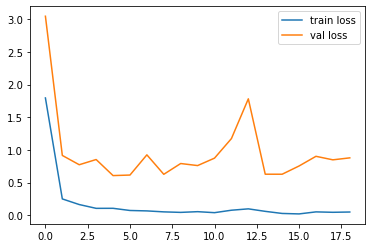

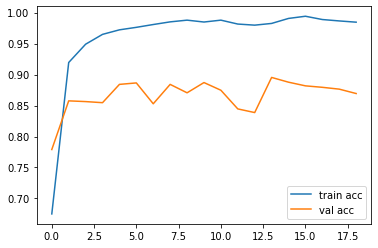

In [ ]:
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
model.save('final_model.h5')

In [ ]:
print("The accuracy of the model:{:.2f} %".format(result.history['accuracy'][-1]*100))
print("The accuracy of the testing:{:.2f} %".format(result.history['val_accuracy'][-1]*100))

The accuracy of the model:98.46 %
The accuracy of the testing:86.94 %
